# Trabajo 2: Árboles de Decisión y Regresiones Lineales

**Integrantes:**

- Integrante1 - Documento1
- Integrante2 - Documento2

**Instrucciones:**

- Modifique el nombre de este archivo con los nombres de los integrantes.
- Agrege los nombres y documentos de los integrantes del equipo en la sección de arriba.
- Resuelva la situación planteada cumpliendo los criterios de aceptación. Estos criterios son los que determinarán su calificación.
- Entregue **únicamente** este notebook. No se aceptarán otro tipo de entregas.

# Criterios de Aceptación

1. **(30%)** Análisis descriptivo de los datos. Realice:
    - Una descripción de cada variable del conjunto de datos.
    - Un recuento de variables nulas en los datos.
    - Un histograma de frecuencias de cada variable.
    - Un gráfico de barras comparando cada variable con la variable objetivo.
    - Un gráfico de mapa de calor de la correlación de los datos.
2. **(30%)** Realice un modelo de árbol de decisión regresor.
    - Divida el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba.
    - Cree variables Dummy para las variables categóricas.
    - Cree y entrene un modelo de árbol de decisión regresor.
    - Entrene hiperparámetros para ajustar el modelo.
    - Del modelo resultante, calcule:
        - Score.
        - Mean Square Error.
        - Root of Mean Square Error.
3. **(30%)** Realice un modelo de regresión lineal.
    - Estandarize las variables numéricas utilizando la técnica `Z-Score`.
    - Cree variables Dummy para las variables categóricas.
    - Divida el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba.
    - Cree y entrene un modelo de regresión lineal múltiple.
    - Del modelo resultante, calcule:
        - Score.
        - Mean Square Error.
        - Root of Mean Square Error.
4. **(10%)** De acuerdo a los resultados de los modelos, argumente cuál es el mejor.

**NOTA: Recuerte definir las semillas aleatorias para que sus resultados sean replicables.**

# Dataset

Este dataset contiene información de venta de apartamentos de los últimos 10 años para un distrito específico en una ciudad.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('Daegu_Real_Estate_data.csv')
pd.set_option('display.max_columns', 30)

In [5]:
df

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_APT,N_manager,N_elevators,SubwayStation,N_FacilitiesNearBy(PublicOffice),N_FacilitiesNearBy(Hospital),N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,3.0,0.0,Kyungbuk_uni_hospital,2.0,1,1.0,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,1.0,2.0,2.0,Daegu,5.0,1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,1.0,2.0,2.0,Daegu,5.0,1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,6.0,5.0,11.0,Sin-nam,1.0,1,0.0,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,8.0,20.0,Myung-duk,6.0,2,0.0,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,7.0,14.0,16.0,Kyungbuk_uni_hospital,3.0,1,2.0,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5887,298230,2006,2017,8,903,13,terraced,individual_heating,management_in_trust,123.0,181.0,5min~10min,0-5min,3.0,3.0,11.0,Myung-duk,3.0,1,1.0,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
5888,357522,2007,2017,8,868,20,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,7.0,14.0,16.0,Kyungbuk_uni_hospital,3.0,1,2.0,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5889,312389,1978,2017,8,1327,1,corridor,individual_heating,self_management,87.0,0.0,0~5min,0-5min,2.0,1.0,4.0,Kyungbuk_uni_hospital,3.0,2,1.0,1.0,0.0,0.0,3.0,3.0,3.0,2.0,3,7.0,11.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5891 non-null   int64  
 1   YearBuilt                           5891 non-null   int64  
 2   YrSold                              5891 non-null   int64  
 3   MonthSold                           5891 non-null   int64  
 4   Size(sqf)                           5891 non-null   int64  
 5   Floor                               5891 non-null   int64  
 6   HallwayType                         5891 non-null   object 
 7   HeatingType                         5891 non-null   object 
 8   AptManageType                       5891 non-null   object 
 9   N_Parkinglot(Ground)                5891 non-null   float64
 10  N_Parkinglot(Basement)              5891 non-null   float64
 11  TimeToBusStop                       5891 no

In [6]:
# Recuento de variables nulas
print("Recuento de las varibles nulas")
print(df.isnull().sum())
print()

Recuento de las varibles nulas
SalePrice                             0
YearBuilt                             0
YrSold                                0
MonthSold                             0
Size(sqf)                             0
Floor                                 0
HallwayType                           0
HeatingType                           0
AptManageType                         0
N_Parkinglot(Ground)                  0
N_Parkinglot(Basement)                0
TimeToBusStop                         0
TimeToSubway                          0
N_APT                                 0
N_manager                             0
N_elevators                           0
SubwayStation                         0
N_FacilitiesNearBy(PublicOffice)      0
N_FacilitiesNearBy(Hospital)          0
N_FacilitiesNearBy(Dpartmentstore)    0
N_FacilitiesNearBy(Mall)              0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(Park)              0
N_SchoolNearBy(Elementary)            0
N_SchoolN

Histograma de frecuencias


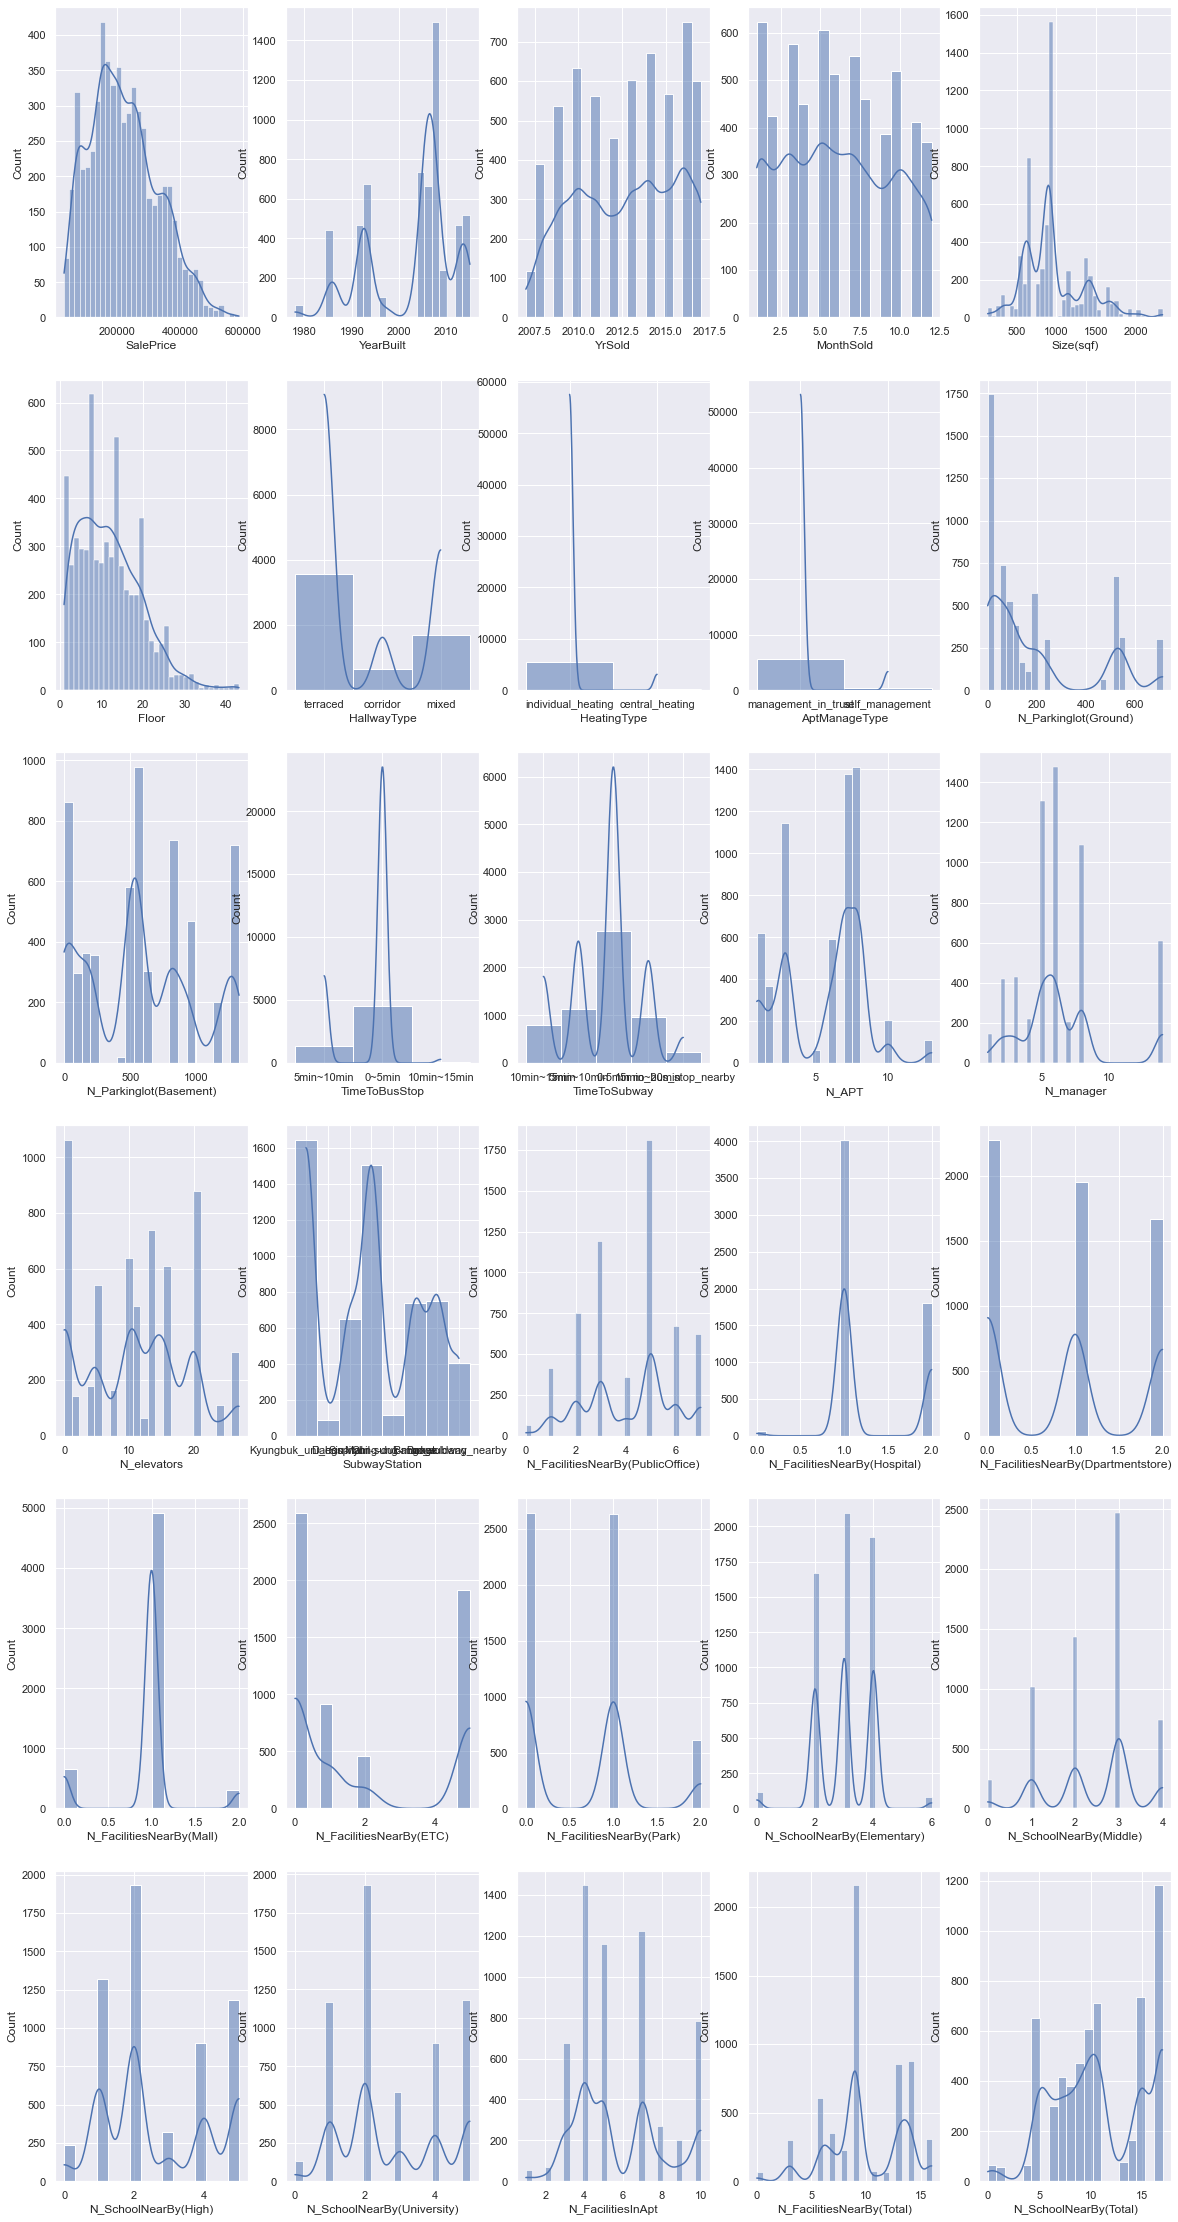

In [8]:
# Histograma de frecuencia de cada variable
print("Histograma de frecuencias")
columns = list(df.columns)
sns.set()
fig = plt.figure(figsize = [20,40])
cols = columns
cnt = 1
for col in cols:
    plt.subplot(6,5,cnt)
    sns.histplot(df[col], kde = True)
    cnt +=1
plt.show()
print()

Gráfico de barras con la variable objetivo


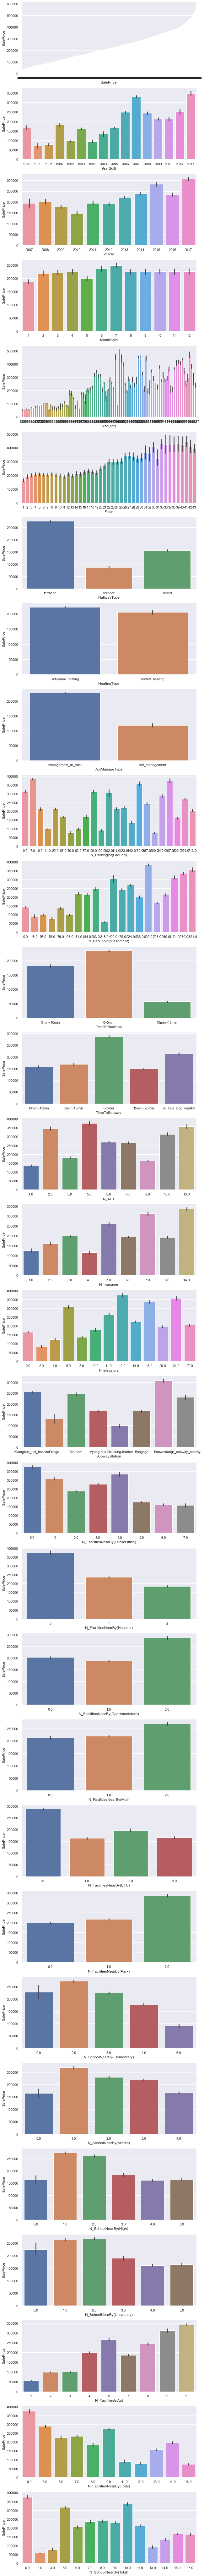

In [9]:
# Gráfico de barras comparando cada variable con la variable objetivo
print("Gráfico de barras con la variable objetivo")
all_vars = df.columns.tolist()

fig, axs = plt.subplots(nrows=len(all_vars), figsize=(10, len(all_vars)*5))
for i, var in enumerate(all_vars):
    sns.barplot(x=var, y='SalePrice', data=df, ax=axs[i])
    
plt.show()
print()

Mapa de calor


<ipython-input-10-5663b4c83507>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


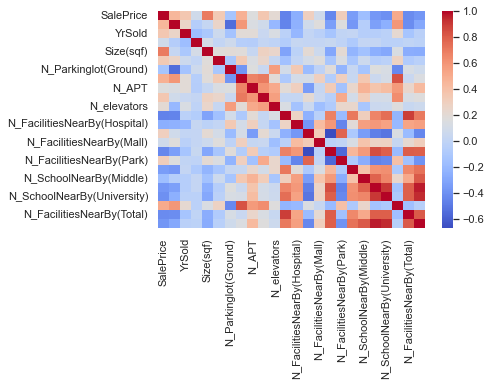

In [10]:
# Gráfico de mapa de calor de la correlación de los datos
print("Mapa de calor")
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm')
print()

In [10]:
data = pd.read_csv("Daegu_Real_Estate_data.csv")
print(data.dtypes)

SalePrice                               int64
YearBuilt                               int64
YrSold                                  int64
MonthSold                               int64
Size(sqf)                               int64
Floor                                   int64
HallwayType                            object
HeatingType                            object
AptManageType                          object
N_Parkinglot(Ground)                  float64
N_Parkinglot(Basement)                float64
TimeToBusStop                          object
TimeToSubway                           object
N_APT                                 float64
N_manager                             float64
N_elevators                           float64
SubwayStation                          object
N_FacilitiesNearBy(PublicOffice)      float64
N_FacilitiesNearBy(Hospital)            int64
N_FacilitiesNearBy(Dpartmentstore)    float64
N_FacilitiesNearBy(Mall)              float64
N_FacilitiesNearBy(ETC)           

2. **(30%)** Realice un modelo de árbol de decisión regresor.
    - Divida el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba.
    - Cree variables Dummy para las variables categóricas.
    - Cree y entrene un modelo de árbol de decisión regresor.
    - Entrene hiperparámetros para ajustar el modelo.
    - Del modelo resultante, calcule:
        - Score.
        - Mean Square Error.
        - Root of Mean Square Error.

## Eliminación de datos innecesarios

In [11]:
dfc = df.copy()
dfc

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_APT,N_manager,N_elevators,SubwayStation,N_FacilitiesNearBy(PublicOffice),N_FacilitiesNearBy(Hospital),N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,3.0,0.0,Kyungbuk_uni_hospital,2.0,1,1.0,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,1.0,2.0,2.0,Daegu,5.0,1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,1.0,2.0,2.0,Daegu,5.0,1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,6.0,5.0,11.0,Sin-nam,1.0,1,0.0,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,536.0,0~5min,15min~20min,8.0,8.0,20.0,Myung-duk,6.0,2,0.0,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,7.0,14.0,16.0,Kyungbuk_uni_hospital,3.0,1,2.0,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5887,298230,2006,2017,8,903,13,terraced,individual_heating,management_in_trust,123.0,181.0,5min~10min,0-5min,3.0,3.0,11.0,Myung-duk,3.0,1,1.0,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
5888,357522,2007,2017,8,868,20,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,7.0,14.0,16.0,Kyungbuk_uni_hospital,3.0,1,2.0,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5889,312389,1978,2017,8,1327,1,corridor,individual_heating,self_management,87.0,0.0,0~5min,0-5min,2.0,1.0,4.0,Kyungbuk_uni_hospital,3.0,2,1.0,1.0,0.0,0.0,3.0,3.0,3.0,2.0,3,7.0,11.0


In [12]:
categorical_variables = []
for column in data.columns:
    if data[column].dtype == 'object' or data[column].dtype.name == 'category':
        categorical_variables.append(column)
print(categorical_variables)

['HallwayType', 'HeatingType', 'AptManageType', 'TimeToBusStop', 'TimeToSubway', 'SubwayStation']


In [13]:
dfc1 = dfc.drop(['HallwayType','HeatingType','AptManageType', 'TimeToBusStop', 'TimeToSubway', 'SubwayStation'], axis = 1)
dfc1

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,N_FacilitiesNearBy(PublicOffice),N_FacilitiesNearBy(Hospital),N_FacilitiesNearBy(Dpartmentstore),N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,111.0,184.0,3.0,3.0,0.0,2.0,1,1.0,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,80.0,76.0,1.0,2.0,2.0,5.0,1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,80.0,76.0,1.0,2.0,2.0,5.0,1,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,249.0,536.0,6.0,5.0,11.0,1.0,1,0.0,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,523.0,536.0,8.0,8.0,20.0,6.0,2,0.0,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,0.0,1270.0,7.0,14.0,16.0,3.0,1,2.0,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5887,298230,2006,2017,8,903,13,123.0,181.0,3.0,3.0,11.0,3.0,1,1.0,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
5888,357522,2007,2017,8,868,20,0.0,1270.0,7.0,14.0,16.0,3.0,1,2.0,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5889,312389,1978,2017,8,1327,1,87.0,0.0,2.0,1.0,4.0,3.0,2,1.0,1.0,0.0,0.0,3.0,3.0,3.0,2.0,3,7.0,11.0


In [14]:
dfc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5891 non-null   int64  
 1   YearBuilt                           5891 non-null   int64  
 2   YrSold                              5891 non-null   int64  
 3   MonthSold                           5891 non-null   int64  
 4   Size(sqf)                           5891 non-null   int64  
 5   Floor                               5891 non-null   int64  
 6   N_Parkinglot(Ground)                5891 non-null   float64
 7   N_Parkinglot(Basement)              5891 non-null   float64
 8   N_APT                               5891 non-null   float64
 9   N_manager                           5891 non-null   float64
 10  N_elevators                         5891 non-null   float64
 11  N_FacilitiesNearBy(PublicOffice)    5891 no

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree
from sklearn import metrics

In [26]:
X = pd.get_dummies(X)

ValueError: Data must be 1-dimensional

In [23]:
X = dfc1.drop(['SalePrice'], axis = 1).values
Y = dfc1['SalePrice'].values

In [ ]:
np.random.seed(12345)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [ ]:
np.random.seed(12345)
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

In [ ]:
dfRP = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
dfRP

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
print("Mean Square Error: ", mse)
print("Root of Mean Square Error: ", rmse)

In [ ]:
regressor.score(X_test.reshape(-1, 1), y_test.reshape(-1, 1))

In [ ]:
plt.figure(figsize = [20,15])
plot_tree(regressor, max_depth=4)
plt.show()